In [13]:
from tensorflow import keras
from keras import datasets, layers
import numpy as np 
import matplotlib.pyplot as plt

In [14]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [15]:
noise_channels = np.random.random((len(train_images), 784))
train_images_with_noise_channels = np.concatenate([train_images, noise_channels], axis=1)

zero_channels = np.zeros((len(train_images), 784))
train_images_with_zero_channels = np.concatenate([train_images, zero_channels], axis=1)

In [16]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [17]:
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, 
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)
history_zero = model.fit(
    train_images_with_zero_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6971 - loss: 1.0721 - val_accuracy: 0.8612 - val_loss: 0.4218
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9122 - loss: 0.2847 - val_accuracy: 0.9323 - val_loss: 0.2162
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9455 - loss: 0.1748 - val_accuracy: 0.9536 - val_loss: 0.1521
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9609 - loss: 0.1260 - val_accuracy: 0.9615 - val_loss: 0.1340
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9723 - loss: 0.0860 - val_accuracy: 0.9658 - val_loss: 0.1199
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9802 - loss: 0.0614 - val_accuracy: 0.9577 - val_loss: 0.1451
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9855 - loss: 0.0461 - val_accuracy: 0.9638 - val_loss: 0.1272
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9898 - loss: 0.0332 - val_accuracy: 0.

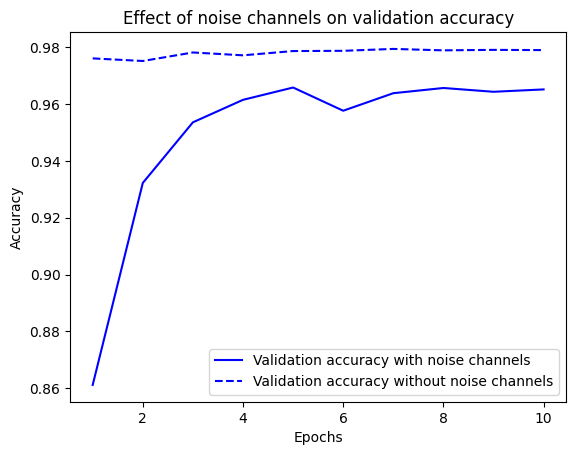

In [18]:
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zero = history_zero.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs,
         val_acc_noise,
         "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs,
         val_acc_zero,
         "b--",
         label="Validation accuracy without noise channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()